# Distribution Checker
This python script verifies the random distribution of treasure room items matches expectations based on the probability of item occurence.
We verify that the total # of times an item appears is within 3 std of the expected value, given by
```math
E[x] = np
std(x) = sqrt(np(1-p))
```
where n is the # of trials run, and p is the probability of item x occuring.

In [1]:
# Load json file containing treasure room item distributions
import json
with open('dist.json') as f:
    dist = json.load(f)

In [2]:
# define probabilities of items occuring
n_saplings = 44 # number of unique trees in the game
sapling_prob = (1/26)/n_saplings
prob = {
    "Iridium Sprinkler": 1/26,
    "Life Elixir" : 1/26,
    "Crystalarium" : 1/26,
    "Energy Tonic" : 1/26,
    "Purple Slime Egg" : 1/26,
    "Prismatic Shard" : 1/26,
    "Rain Totem" : 1/26,
    "Warp Totem: Farm" : 1/26,
    "Cactus Seeds" : 1/26,
    "Quality Sprinkler" : 1/26,
    "Bomb" : 1/26,
    "Pumpkin Soup" : 1/260,
    "Yam Seeds" : 1/702,
    "Blue Cowboy Hat" : 1/26,
    "Fall Seeds" : 1/702,
    "Dark Cowboy Hat" : 1/26,
    "Auto-Grabber" : 1/26,
    "Cherry Bomb" : 1/26,
    "Red Cowboy Hat" : 1/26,
    "Auto-Petter" : 1/26,
    "White Turban" : 1/26,
    "Autumn's Bounty" : 1/260,
    "Seed Maker" : 1/26,
    "Mega Bomb" : 1/26,
    "Stuffing" : 1/260,
    "Red Slime Egg" : 1/26,
    "Apple Sapling" : sapling_prob,
    "Iridium Bar" : 1/26,
    "Super Meal" : 1/260,
    "Peach Sapling" : sapling_prob,
    "Omni Geode" : 1/26,
    "Miner's Treat" : 1/260,
    "Cherry Sapling" : sapling_prob,
    "Pomegranate Sapling" : sapling_prob,
    "Cranberry Sauce" : 1/260,
    "Orange Sapling" : sapling_prob,
    "Roots Platter" : 1/260,
    "Beet Seeds" : 1/702,
    "Apricot Sapling" : sapling_prob,
    "Farmer's Lunch" : 1/260,
    "Pumpkin Seeds" : 1/702,
    "Garlic Seeds" : 1/702,
    "Starfruit Seeds" : 1/702,
    "Cauliflower Seeds" : 1/702,
    "Melon Seeds" : 1/702,
    "Summer Seeds" : 1/702,
    "Dish O' The Sea" : 1/260,
    "Survival Burger" : 1/260,
    "Potato Seeds" : 1/702,
    "Tomato Seeds" : 1/702,
    "Artichoke Seeds" : 1/702,
    "Kale Seeds" : 1/702,
    "Cranberry Seeds" : 1/702,
    "Bean Starter" : 1/702,
    "Rhubarb Seeds" : 1/702,
    "Pepper Seeds" : 1/702,
    "Winter Seeds" : 1/702,
    "Spring Seeds" : 1/702,
    "Red Cabbage Seeds" : 1/702,
    "Wheat Seeds" : 1/702,
    "Radish Seeds" : 1/702,
    "Corn Seeds" : 1/702,
    "Bok Choy Seeds" : 1/702,
    "Eggplant Seeds" : 1/702,
    "Parsnip Seeds" : 1/702,
    "Blueberry Seeds" : 1/702,
}

# verify no regular treasre room items are missing
for k in prob.keys():
    if k not in dist:
        print('Missing item ' + k)

# verify total # of unique sapling appearances matches # of trees in game 
total = 0
for k in dist.keys():
    if k not in prob:
        prob[k] = sapling_prob
    if 'Sapling' in k:
        total += 1
print('Total saplings: ' + str(total))

Total saplings: 44


<BarContainer object of 104 artists>

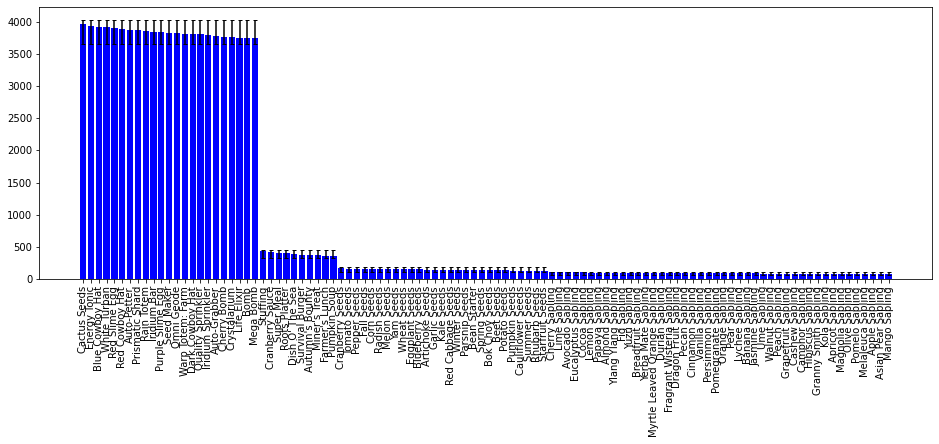

In [3]:
# Plot histogram of item occurences with error bars representing expected value range.
# Bars that are outside of the range appear in red.
import math
import numpy as np
import pylab as plt

n = 100000 # number of trials run
dist = dict(sorted(dist.items(),key=lambda x: x[1],reverse=True))
expected = [n*prob[item] for item in dist.keys()]
lo_limit = [max(0,dist[item] - (n*prob[item] - 3*math.sqrt(n*prob[item]*(1-prob[item])))) for item in dist.keys()]
hi_limit = [max(0,n*prob[item] + 3*math.sqrt(n*prob[item]*(1-prob[item])) - dist[item]) for item in dist.keys()]
color = ['b' if abs(dist[item] - n*prob[item]) < 3*math.sqrt(n*prob[item]*(1-prob[item])) else 'r' for item in dist.keys()]
fig = plt.figure(figsize = (16, 5))
plt.xticks(rotation=90)
plt.bar(dist.keys(), dist.values(),yerr=(lo_limit, hi_limit), capsize=2, color=color)
